In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.gridspec as gridspec
from astropy.io import fits
from scipy.optimize import curve_fit
from dustmaps.marshall import MarshallQuery
from dustmaps.config import config

# Set the local data storage path for dustmaps
config['data_dir'] = '/Users/baotong/dustmaps/'  # Adjust this to your local path


In [60]:
marshallstar = MarshallQuery()

In [64]:
path='/Users/baotong/data_GalDisc/data/'
hamstar = fits.open(path + 'match_e_xmm/HamStar_eRASS1_Main_Likely_Identifications_v1.1.fits')[1].data
print(hamstar['G'])
print(hamstar['BP_RP'])
print(hamstar['PLX'])
mask = (
    ~np.isnan(hamstar['PLX']) &  # PLX should not be NaN
    (hamstar['PLX'] > 0) &       # PLX should be positive
    ~np.isnan(hamstar['G']) &    # G should not be NaN
    ~np.isnan(hamstar['BP_RP'])  # BP_RP should not be NaN
)
ra=hamstar[mask]['CTP_RA']
dec=hamstar[mask]['CTP_DEC']
distkpc=1/hamstar[mask]['PLX']
coords=SkyCoord(ra=ra,dec=dec,unit=(u.deg, u.deg), 
                frame='icrs', distance=distkpc*u.kpc)
ebv_samples = marshallstar(coords)

[10.17718029 10.64623451 13.61757469 ... 11.03914165  8.1594038
  8.4171896 ]
[1.08212852 1.09740162 2.09108543 ... 0.72494602 0.99697113 0.3502655 ]
[12.35757923 11.3815794   9.8738699  ...  2.03272517 23.13839137
  5.38308252]


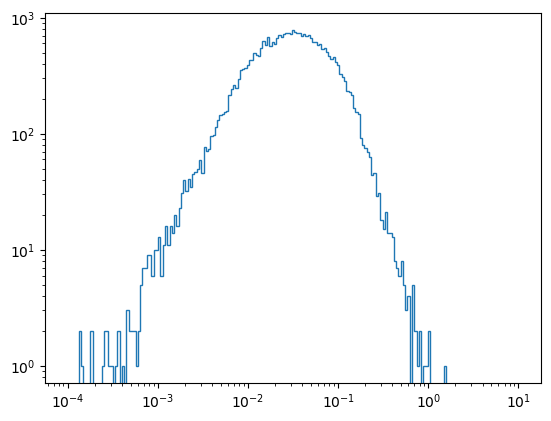

In [ ]:
R_G, R_BP, R_RP = 2.74, 3.14, 2.05
A_G = R_G * np.array(ebv_samples)
A_BP = R_BP * np.array(ebv_samples)
A_RP = R_RP * np.array(ebv_samples)
# Correct magnitudes
corrected_m_g = hamstar[mask]['G'] - A_G
corrected_bp_rp=hamstar[mask]['BP_RP']-(A_BP-A_RP)
plt.hist(hamstar[mask]['BP_RP']-corrected_bp_rp,bins=np.logspace(-4,1,200),histtype='step')
plt.loglog()
plt.show()

In [75]:
absG=corrected_m_g-5*(np.log10(distkpc*1000/10))
absG_org=hamstar[mask]['G']-5*(np.log10(distkpc*1000/10))

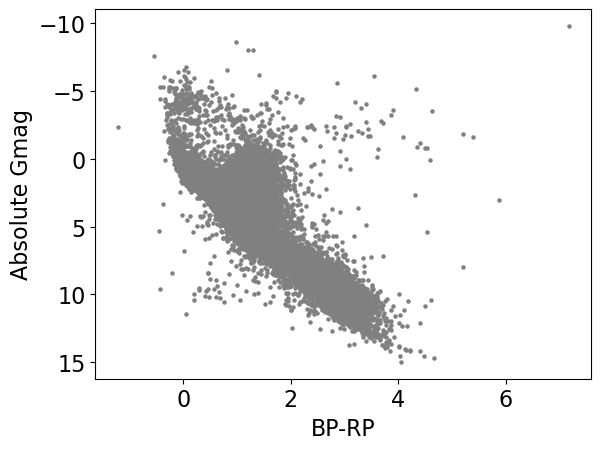

In [80]:
plt.scatter(corrected_bp_rp,absG,marker='.', 
            s=20, color='gray',
            label='new' )
# plt.scatter(hamstar[mask]['BP_RP']-corrected_bp_rp,absG_org-absG,marker='.', 
#             s=20, color='brown',
#             label='old' )
plt.gca().invert_yaxis()
plt.xlabel('BP-RP', fontsize=16)
plt.ylabel('Absolute Gmag', fontsize=16)
plt.tick_params(labelsize=16)
# plt.xlim(-2,4)

In [85]:
from dustmaps.bayestar import BayestarQuery
from astropy.coordinates import SkyCoord
import astropy.units as u
from dustmaps.config import config
from dustmaps.marshall import MarshallQuery

In [45]:
from dustmaps.marshall import fetch
config['data_dir'] = '/Users/baotong/dustmaps/'  # 设置数据存储路径
fetch()

  0.0 B of 5.0 MiB |   0.0 s/B |                        |   0% | ETA:  --:--:--
260.0 KiB of 5.0 MiB |   4.5 MiB/s |#                   |   5% | ETA:  00:00:00
648.0 KiB of 5.0 MiB |   5.7 MiB/s |##                  |  12% | ETA:   0:00:00
  1.1 MiB of 5.0 MiB |   5.7 MiB/s |####                |  21% | ETA:   0:00:00
  1.6 MiB of 5.0 MiB |   7.4 MiB/s |######              |  31% | ETA:   0:00:00
  2.0 MiB of 5.0 MiB |   7.4 MiB/s |########            |  40% | ETA:   0:00:00
  2.6 MiB of 5.0 MiB |   7.9 MiB/s |##########          |  51% | ETA:   0:00:00
  3.2 MiB of 5.0 MiB |   7.9 MiB/s |############        |  63% | ETA:   0:00:00
  3.7 MiB of 5.0 MiB |   8.5 MiB/s |##############      |  74% | ETA:   0:00:00
  4.3 MiB of 5.0 MiB |   8.5 MiB/s |#################   |  86% | ETA:   0:00:00
  4.9 MiB of 5.0 MiB |   9.1 MiB/s |################### |  98% | ETA:   0:00:00


  0.0 B of 12.1 KiB |   0.0 s/B |                       |   0% | ETA:  --:--:--


 GLON  GLAT x2all x2gts  nb  r1   ext1 ... e_r32 e_ext32 r33 ext33 e_r33 e_ext33
 deg   deg                  kpc   mag  ...  kpc    mag   kpc  mag   kpc    mag  
------ ---- ----- ----- --- ---- ----- ... ----- ------- --- ----- ----- -------
 260.0 8.75  1.51    --   4 0.53 0.048 ...    --      --  --    --    --      --
260.25 8.75 0.067    --   3 0.55 0.062 ...    --      --  --    --    --      --
 260.5 8.75 0.677 2.965   3 0.76 0.076 ...    --      --  --    --    --      --
260.75 8.75  0.07    --   4 0.79 0.095 ...    --      --  --    --    --      --
 261.0 8.75  1.71    --   3 0.79 0.077 ...    --      --  --    --    --      --
261.25 8.75  0.55    --   2 0.88 0.074 ...    --      --  --    --    --      --
 261.5 8.75  0.45    --   2 1.02 0.048 ...    --      --  --    --    --      --
261.75 8.75  0.02    --   3 0.91 0.071 ...    --      --  --    --    --      --
 262.0 8.75 0.897    --   3  0.6 0.032 ...    --      --  --    --    --      --
   ...  ...   ...   ... ... 

In [47]:
config['data_dir'] = '/Users/baotong/dustmaps/'  # 设置数据存储路径

# from dustmaps.bayestar import fetch
# fetch()


In [57]:
from dustmaps.marshall import MarshallQuery
from astropy.coordinates import SkyCoord
import astropy.units as u
marshallstar = MarshallQuery()
ra=np.array([265.0158175,263.0158175])
dec=np.array([-32.39074386,-32.39074386])
distances=np.array([1,2])
coords = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs',distance=distances*u.kpc)
print(marshallstar(coords))
# for d, e in zip(distances, ebv_samples[0]):
#     print(f"Distance: {d:.2f} kpc, E(B-V): {e:.4f}")



[0.12482758 0.2923    ]


A_G=2.74*E(B-V)

A_{BP}=3.14*E(B-V)

A_{RP}=2.05*E(B-V)

m_corrected=m_observed-Av

In [20]:
target_distance = 2.2
distances_pc = np.array(bayestar.distances)
ebv_target = np.interp(target_distance, distances_pc, ebv_samples[0])
print(f"Target Distance: {target_distance} kpc, E(B-V): {ebv_target:.4f}")

Target Distance: 2.2 kpc, E(B-V): 0.7800


[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  21  24
  28  29  32  33  34  35  39  40  41  42  43  44  46  48  49  50  52  53
  54  55  56  57  58  59  60  61  62  63  64  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  91  92
  96  97  98  99 100 101 105 107 108 109 112 115 117 118 119 120 121 122
 123 124 126 127 129 130 131 132 133 135 136 137 138 139 140 141]


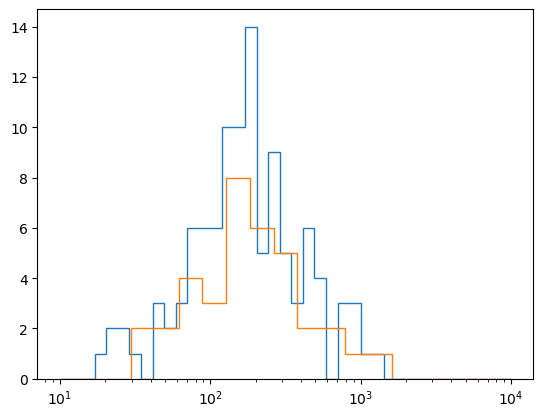

In [28]:
path= '/Users/baotong/data_GalDisc/data/match_e_xmm/'
tablename='e_xmmdr14s_merge_spec_starinfo.xlsx'
df=pd.read_excel(path+tablename,sheet_name='label')
filtered_df = df[(df['sep_exmm'] < 17)]
filtered_df=filtered_df.dropna(subset=['gaia_gmag', 'gaia_bpmag','gaia_rpmag'])
Lsun = 3.846e33 * u.erg / u.s
msun=-26.7 
absmsun = 4.66
Fopt=10**(0.4*(msun-np.array(filtered_df['gaia_gmag'].values)))*Lsun/(4*np.pi*(1*u.au)**2)
Fopt=Fopt.to(u.erg/u.cm**2/u.s).value
Fx = filtered_df['xmmflux'].values
Fx_err=filtered_df['xmmfluxerr'].values
BP_RP = filtered_df['gaia_bpmag'].values-filtered_df['gaia_rpmag'].values
CTP_SEP = np.array(filtered_df['CTP_SEP'])
ToType = np.array(filtered_df['ToType'])
abs_Gmag = filtered_df['gaia_gmag'].values-5 * (np.log10(filtered_df['distkpc'].values*1000/10))
indexstar = np.where(CTP_SEP > 0)[0]
indexnotstar = np.where(CTP_SEP < 0)[0]
index_hards = np.where(ToType == 'hardS')[0]
index_CV = np.where(ToType == 'CV')[0]
index_LMXB = np.where(ToType == 'LMXB')[0]
index_AGN = np.where(ToType == 'AGN')[0]
print(indexstar)
hamstar = fits.open(path + 'HamStar_eRASS1_Main_Likely_Identifications_v1.1.fits')[1].data
distkpcall=1/hamstar['PLX']
plt.hist(distkpcall[indexstar]*1000,bins=np.logspace(1,4,40),histtype='step')
plt.hist(distkpcall[indexnotstar]*1000,bins=np.logspace(1,4,20),histtype='step')
plt.semilogx()
plt.show()